Importing library

In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# visualization style
plt.style.use('seaborn-v0_8-white')
sns.set_palette('viridis')

# Display settings
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

### Load the Datasets

In [27]:
# Load social profiles data
social_profiles = pd.read_csv('../data/customer_social_profiles.csv')

# Load transactions data
transactions = pd.read_csv('../data/customer_transactions.csv')

# Display the first few rows (each dataset) 
print("Customer Social Profiles:")
display(social_profiles.head())

print("\nCustomer Transactions:")
display(transactions.head())

# Dataset dimensions
print(f"Social profiles shape: {social_profiles.shape}")
print(f"Transactions shape: {transactions.shape}")

Customer Social Profiles:


,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,A178,LinkedIn,74,4.9,Positive
1,A190,Twitter,82,4.8,Neutral
2,A150,Facebook,96,1.6,Positive
3,A162,Twitter,89,2.6,Positive
4,A197,Twitter,92,2.3,Neutral



Customer Transactions:


,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,Sports,2.3
1,192,1002,332,2024-01-02,Electronics,4.2
2,114,1003,442,2024-01-03,Electronics,2.1
3,171,1004,256,2024-01-04,Clothing,2.8
4,160,1005,64,2024-01-05,Clothing,1.3


Social profiles shape: (155, 5)
Transactions shape: (150, 6)


###  Summary Statistics

In [28]:
# Summary statistics (social profiles) 
print(" Summary Statistics for Social Profiles:")
display(social_profiles.describe(include='all').T)

# Summary statistics  (transactions)
print("\n Summary Statistics for Transactions:")
display(transactions.describe(include='all').T)

# Check unique values in categorical columns
print('\nSocial Media Platforms:', social_profiles['social_media_platform'].unique())
print('Review Sentiments:', social_profiles['review_sentiment'].unique())
print('Product Categories:', transactions['product_category'].unique())

 Summary Statistics for Social Profiles:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id_new,155,84,A155,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
social_media_platform,155,5,Twitter,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engagement_score,155.0,NaN,NaN,NaN,75.606452,14.568021,50.0,63.5,77.0,87.5,99.0
purchase_interest_score,155.0,NaN,NaN,NaN,3.152903,1.142867,1.0,2.35,3.2,4.1,5.0
review_sentiment,155,3,Positive,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Summary Statistics for Transactions:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id_legacy,150.0,NaN,NaN,NaN,148.76,30.046425,100.0,121.25,150.5,174.75,199.0
transaction_id,150.0,NaN,NaN,NaN,1075.5,43.445368,1001.0,1038.25,1075.5,1112.75,1150.0
purchase_amount,150.0,NaN,NaN,NaN,280.78,121.329595,51.0,179.0,274.0,388.5,495.0
purchase_date,150,150,2024-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category,150,5,Sports,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_rating,140.0,NaN,NaN,NaN,2.985,1.20699,1.0,1.95,3.0,4.0,5.0



Social Media Platforms: ['LinkedIn' 'Twitter' 'Facebook' 'TikTok' 'Instagram']
Review Sentiments: ['Positive' 'Neutral' 'Negative']
Product Categories: ['Sports' 'Electronics' 'Clothing' 'Groceries' 'Books']


In [29]:
# Check data types and missing values in social profiles 
print("Social Profiles Data Types:")
display(social_profiles.dtypes)
print("\nSocial Profiles Missing Values:")
display(social_profiles.isnull().sum())

# Check data types and missing values in transactions
print("\nTransactions Data Types:")
display(transactions.dtypes)
print("\nTransactions Missing Values:")
display(transactions.isnull().sum())

# Check for duplicates
print(f"\nDuplicates in social profiles: {social_profiles.duplicated().sum()}")
print(f"Duplicates in transactions: {transactions.duplicated().sum()}")

# Check for duplicates in customer IDs
print(f"Duplicates in social profiles customer_id_new: {social_profiles['customer_id_new'].duplicated().sum()}")
print(f"Duplicates in transactions customer_id_legacy: {transactions['customer_id_legacy'].duplicated().sum()}")

Social Profiles Data Types:


customer_id_new             object
social_media_platform       object
engagement_score             int64
purchase_interest_score    float64
review_sentiment            object
dtype: object


Social Profiles Missing Values:


customer_id_new            0
social_media_platform      0
engagement_score           0
purchase_interest_score    0
review_sentiment           0
dtype: int64


Transactions Data Types:


customer_id_legacy      int64
transaction_id          int64
purchase_amount         int64
purchase_date          object
product_category       object
customer_rating       float64
dtype: object


Transactions Missing Values:


customer_id_legacy     0
transaction_id         0
purchase_amount        0
purchase_date          0
product_category       0
customer_rating       10
dtype: int64


Duplicates in social profiles: 5
Duplicates in transactions: 0
Duplicates in social profiles customer_id_new: 71
Duplicates in transactions customer_id_legacy: 75


### Data Visualization

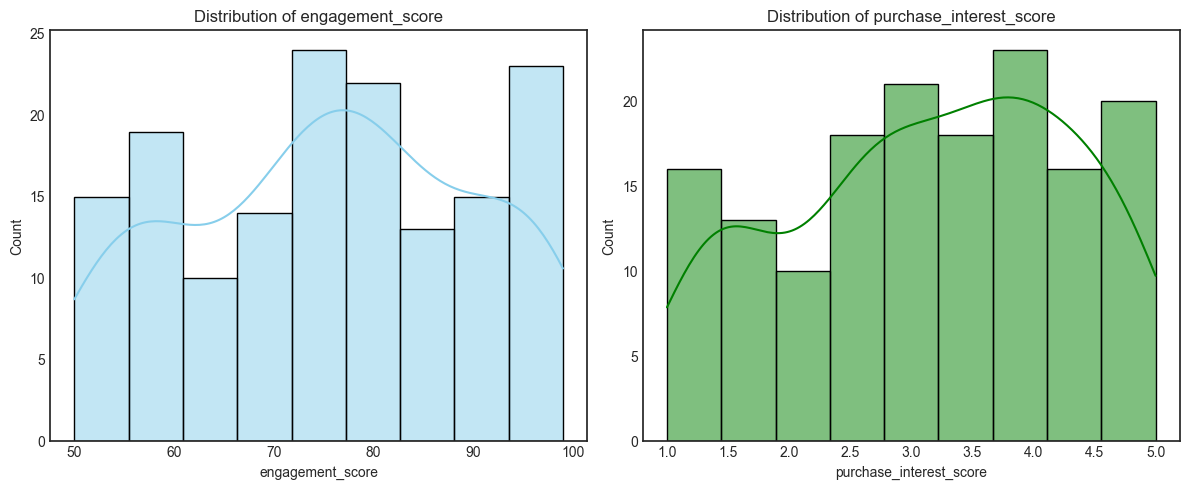

In [30]:
colors = ['skyblue', 'green']  

plt.figure(figsize=(12, 5))
for i, col in enumerate(social_profiles.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(1, 2, i+1)
    sns.histplot(social_profiles[col], kde=True, color=colors[i % len(colors)])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

 Distribution of product categories in transactions

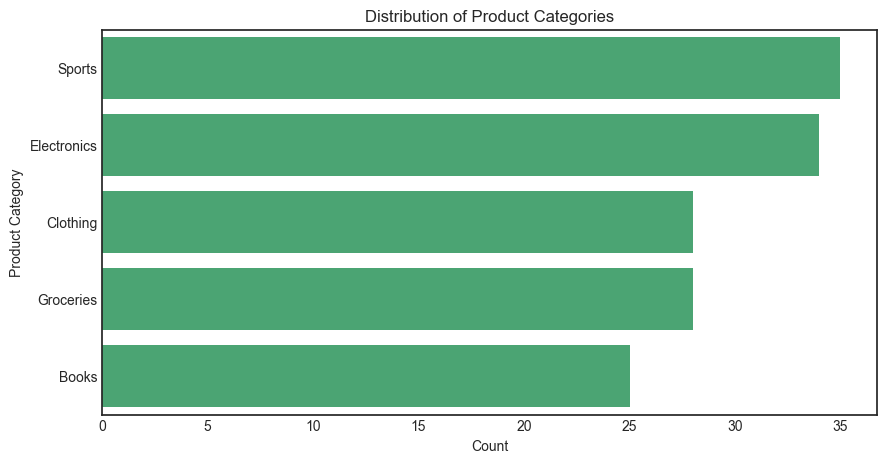

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(
    y=transactions['product_category'],
    order=transactions['product_category'].value_counts().index,
    color='mediumseagreen'  # You can change this to any valid color name or hex code
)
plt.title('Distribution of Product Categories')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()


 Analyzing Customer ID Relationship

In [32]:
import re

# Extract numeric part from customer_id_new
social_profiles['customer_id_num'] = social_profiles['customer_id_new'].apply(
    lambda x: int(re.search(r'A(\d+)', x).group(1))
)

# Check overlap between the two datasets
social_ids = set(social_profiles['customer_id_num'])
trans_ids = set(transactions['customer_id_legacy'])
overlap = social_ids.intersection(trans_ids)

print('Number of unique customer_id_num in social:', len(social_ids))
print('Number of unique customer_id_legacy in transactions:', len(trans_ids))
print('Number of overlapping IDs:', len(overlap))
print('Percentage of social profiles with matching transactions:', 
      round(len(overlap) / len(social_ids) * 100, 2), '%')
print('Percentage of transactions with matching social profiles:', 
      round(len(overlap) / len(trans_ids) * 100, 2), '%')

Number of unique customer_id_num in social: 84
Number of unique customer_id_legacy in transactions: 75
Number of overlapping IDs: 61
Percentage of social profiles with matching transactions: 72.62 %
Percentage of transactions with matching social profiles: 81.33 %


Distribution of social media platforms

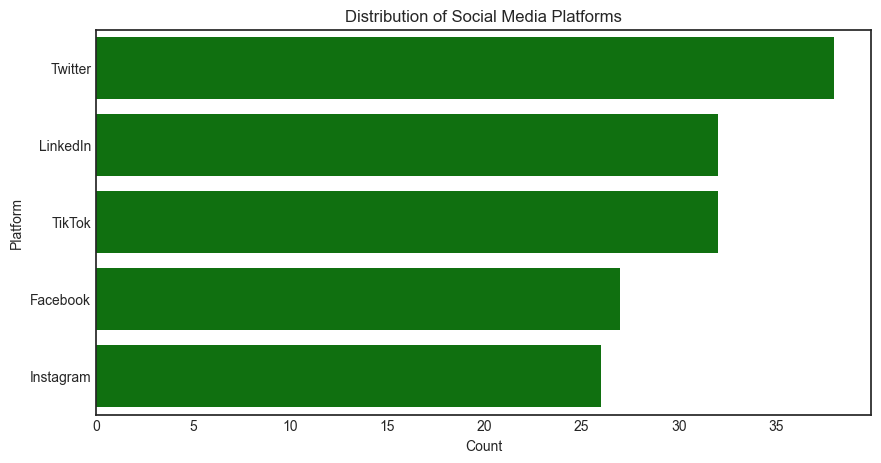

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(
    y=social_profiles['social_media_platform'], 
    order=social_profiles['social_media_platform'].value_counts().index,
    color='green'  
)
plt.title('Distribution of Social Media Platforms')
plt.xlabel('Count')
plt.ylabel('Platform')
plt.show()


Data Cleaning

In [34]:
# Handle missing values in social profiles
social_profiles_clean = social_profiles.copy()
print(f"Original social profiles shape: {social_profiles.shape}")

# Since we have duplicated customer IDs, let's keep only unique customer IDs
# We'll keep the first occurrence of each customer ID
social_profiles_clean = social_profiles_clean.drop_duplicates(subset=['customer_id_new'])
print(f"Social profiles shape after removing duplicate customer IDs: {social_profiles_clean.shape}")

# No missing values to handle in social profiles
print("\nMissing values in social profiles after cleaning:")
display(social_profiles_clean.isnull().sum())

Original social profiles shape: (155, 6)
Social profiles shape after removing duplicate customer IDs: (84, 6)

Missing values in social profiles after cleaning:


customer_id_new            0
social_media_platform      0
engagement_score           0
purchase_interest_score    0
review_sentiment           0
customer_id_num            0
dtype: int64

In [35]:
# Handle missing values and duplicates in transactions
transactions_clean = transactions.copy()
print(f"Original transactions shape: {transactions.shape}")

# Since we have duplicated customer IDs, let's aggregate transactions by customer
# We'll keep one row per customer with their most recent transaction
transactions_clean = transactions_clean.sort_values('purchase_date', ascending=False)
transactions_clean = transactions_clean.drop_duplicates(subset=['customer_id_legacy'])
print(f"Transactions shape after keeping most recent transaction per customer: {transactions_clean.shape}")

# Handle missing values in customer_rating
print(f"Missing customer ratings: {transactions_clean['customer_rating'].isnull().sum()}")
transactions_clean['customer_rating'] = transactions_clean['customer_rating'].fillna(
    transactions_clean['customer_rating'].median()
)

print("\nMissing values after cleaning:")
display(transactions_clean.isnull().sum())

Original transactions shape: (150, 6)
Transactions shape after keeping most recent transaction per customer: (75, 6)
Missing customer ratings: 6

Missing values after cleaning:


customer_id_legacy    0
transaction_id        0
purchase_amount       0
purchase_date         0
product_category      0
customer_rating       0
dtype: int64

 Data Merge

In [36]:
# finding the common key
print("Social profiles columns:")
print(social_profiles_clean.columns.tolist())
print("\nTransactions columns:")
print(transactions_clean.columns.tolist())



Social profiles columns:
['customer_id_new', 'social_media_platform', 'engagement_score', 'purchase_interest_score', 'review_sentiment', 'customer_id_num']

Transactions columns:
['customer_id_legacy', 'transaction_id', 'purchase_amount', 'purchase_date', 'product_category', 'customer_rating']


In [37]:
# We'll merge on customer_id_num (social profiles) and customer_id_legacy (transactions)
print("\nSample of customer_id_num from social profiles:")
print(social_profiles_clean[['customer_id_new', 'customer_id_num']].head())

print("\nSample of customer_id_legacy from transactions:")
print(transactions_clean[['customer_id_legacy']].head())


Sample of customer_id_num from social profiles:
  customer_id_new  customer_id_num
0            A178              178
1            A190              190
2            A150              150
3            A162              162
4            A197              197

Sample of customer_id_legacy from transactions:
     customer_id_legacy
149                 113
148                 189
147                 104
146                 100
145                 102


In [38]:
# Merging  the datasets
merged_df = pd.merge(
    social_profiles_clean, 
    transactions_clean, 
    left_on='customer_id_num', 
    right_on='customer_id_legacy', 
    how='inner'
)

print(f"Shape of merged dataset: {merged_df.shape}")
print(f"Number of unique customers: {merged_df['customer_id_new'].nunique()}")
display(merged_df.head())

Shape of merged dataset: (61, 12)
Number of unique customers: 61


,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment,customer_id_num,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,A190,Twitter,82,4.8,Neutral,190,190,1140,401,2024-05-19,Sports,4.9
1,A150,Facebook,96,1.6,Positive,150,150,1046,177,2024-02-15,Books,3.6
2,A162,Twitter,89,2.6,Positive,162,162,1116,343,2024-04-25,Books,1.4
3,A151,TikTok,61,1.3,Neutral,151,151,1001,408,2024-01-01,Sports,2.3
4,A137,LinkedIn,93,3.5,Neutral,137,137,1020,286,2024-01-20,Electronics,3.2


In [39]:
import pandas as pd

# Convert purchase_date to datetime type for date-related features
merged_df['purchase_date'] = pd.to_datetime(merged_df['purchase_date'])

# Extract useful date parts
merged_df['purchase_day'] = merged_df['purchase_date'].dt.day
merged_df['purchase_month'] = merged_df['purchase_date'].dt.month
merged_df['purchase_weekday'] = merged_df['purchase_date'].dt.weekday  # Monday=0, Sunday=6

# Create a flag for high engagement (threshold = 80 as example)
merged_df['high_engagement'] = (merged_df['engagement_score'] > 80).astype(int)

# Create a flag for high purchase interest (threshold = 3.0 as example)
merged_df['high_purchase_interest'] = (merged_df['purchase_interest_score'] > 3.0).astype(int)

# Encode categorical variables to numeric (simple label encoding)
merged_df['social_media_platform_encoded'] = merged_df['social_media_platform'].astype('category').cat.codes
merged_df['review_sentiment_encoded'] = merged_df['review_sentiment'].astype('category').cat.codes
merged_df['product_category_encoded'] = merged_df['product_category'].astype('category').cat.codes

# Aggregate: Calculate total purchase amount per customer (group by customer_id_new)
total_purchase = merged_df.groupby('customer_id_new')['purchase_amount'].sum().reset_index()
total_purchase = total_purchase.rename(columns={'purchase_amount': 'total_purchase_amount'})
merged_df = merged_df.merge(total_purchase, on='customer_id_new', how='left')

# Preview the new features
print(merged_df.head())


  customer_id_new social_media_platform  engagement_score  purchase_interest_score review_sentiment  customer_id_num  customer_id_legacy  transaction_id  purchase_amount purchase_date product_category  customer_rating  purchase_day  purchase_month  purchase_weekday  high_engagement  high_purchase_interest  social_media_platform_encoded  review_sentiment_encoded  product_category_encoded  total_purchase_amount
0            A190               Twitter                82                      4.8          Neutral              190                 190            1140              401    2024-05-19           Sports              4.9            19               5                 6                1                       1                              4                         1                         4                    401
1            A150              Facebook                96                      1.6         Positive              150                 150            1046              177    2

In [51]:
import pandas as pd
from pathlib import Path

# The merged dataset, 'merged_df', is assumed ready at this point.

# Convert 'purchase_date' from string to datetime format to make date operations easier
merged_df['purchase_date'] = pd.to_datetime(merged_df['purchase_date'])

# Break down the purchase date into day, month, and weekday components for better analysis
merged_df['purchase_day'] = merged_df['purchase_date'].dt.day
merged_df['purchase_month'] = merged_df['purchase_date'].dt.month
merged_df['purchase_weekday'] = merged_df['purchase_date'].dt.weekday  # Monday=0

# Create simple binary flags to identify customers with high engagement and high purchase interest
merged_df['high_engagement'] = (merged_df['engagement_score'] > 80).astype(int)
merged_df['high_purchase_interest'] = (merged_df['purchase_interest_score'] > 3.0).astype(int)

# Turn categorical columns into numeric codes to prepare for modeling
merged_df['social_media_platform_encoded'] = merged_df['social_media_platform'].astype('category').cat.codes
merged_df['review_sentiment_encoded'] = merged_df['review_sentiment'].astype('category').cat.codes
merged_df['product_category_encoded'] = merged_df['product_category'].astype('category').cat.codes

# Calculate total amount spent by each customer and add it as a new feature
total_purchase = merged_df.groupby('customer_id_new')['purchase_amount'].sum().reset_index()
total_purchase = total_purchase.rename(columns={'purchase_amount': 'total_purchase_amount'})
merged_df = merged_df.merge(total_purchase, on='customer_id_new', how='left')

# Set up the path to save the engineered dataset outside the Notebooks folder, inside 'data'
data_folder = Path.cwd().parent / 'data'
data_folder.mkdir(parents=True, exist_ok=True)  # Make sure the folder exists

output_path = data_folder / 'merged_engineered_dataset.csv'

# Save the final dataset with all new features for later use
merged_df.to_csv(output_path, index=False)

print(f"Engineered dataset successfully saved to: {output_path.resolve()}")


Engineered dataset successfully saved to: C:\Users\Djafari\Desktop\Formative2_Group10\data\merged_engineered_dataset.csv


### 1.7 Merge Validation

In [41]:

# Checking how many records we have now

print(f"Original social profiles count: {social_profiles_clean.shape[0]}")
print(f"Original transactions count: {transactions_clean.shape[0]}")
print(f"Merged dataset count: {merged_df.shape[0]}")



Original social profiles count: 84
Original transactions count: 75
Merged dataset count: 61


In [42]:
# Calculate percentage of records that were matched
print(f"Percentage of social profiles matched: {merged_df.shape[0]/social_profiles_clean.shape[0]*100:.2f}%")
print(f"Percentage of transactions matched: {merged_df.shape[0]/transactions_clean.shape[0]*100:.2f}%")



Percentage of social profiles matched: 72.62%
Percentage of transactions matched: 81.33%


In [43]:
# Checking for any duplicate 
duplicate_columns = [col for col in merged_df.columns if col.endswith('_x') or col.endswith('_y')]
print(f"Duplicate columns created during merge: {duplicate_columns}")



Duplicate columns created during merge: ['total_purchase_amount_x', 'total_purchase_amount_y']


In [44]:
# Verify data integrity 
print("\nMissing values in merged dataset:")
display(merged_df.isnull().sum())


Missing values in merged dataset:


customer_id_new                  0
social_media_platform            0
engagement_score                 0
purchase_interest_score          0
review_sentiment                 0
customer_id_num                  0
customer_id_legacy               0
transaction_id                   0
purchase_amount                  0
purchase_date                    0
product_category                 0
customer_rating                  0
purchase_day                     0
purchase_month                   0
purchase_weekday                 0
high_engagement                  0
high_purchase_interest           0
social_media_platform_encoded    0
review_sentiment_encoded         0
product_category_encoded         0
total_purchase_amount_x          0
total_purchase_amount_y          0
dtype: int64

In [45]:
# Checking for any duplicate 
duplicate_columns = [col for col in merged_df.columns if col.endswith('_x') or col.endswith('_y')]
print(f"Duplicate columns created during merge: {duplicate_columns}")

# Verify data integrity after merge
print("\nMissing values in merged dataset:")
display(merged_df.isnull().sum())

Duplicate columns created during merge: ['total_purchase_amount_x', 'total_purchase_amount_y']

Missing values in merged dataset:


customer_id_new                  0
social_media_platform            0
engagement_score                 0
purchase_interest_score          0
review_sentiment                 0
customer_id_num                  0
customer_id_legacy               0
transaction_id                   0
purchase_amount                  0
purchase_date                    0
product_category                 0
customer_rating                  0
purchase_day                     0
purchase_month                   0
purchase_weekday                 0
high_engagement                  0
high_purchase_interest           0
social_media_platform_encoded    0
review_sentiment_encoded         0
product_category_encoded         0
total_purchase_amount_x          0
total_purchase_amount_y          0
dtype: int64

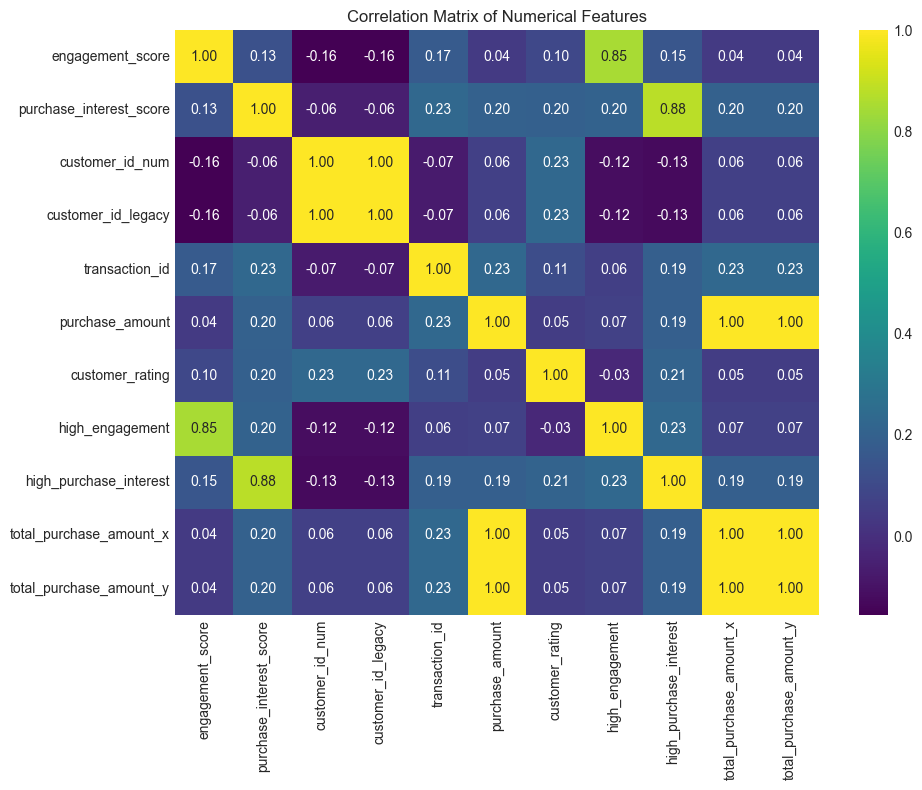

In [46]:
# Correlation heatmap of numerical features in the merged dataset
plt.figure(figsize=(10, 8))

# Select numerical columns for correlation analysis
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns

#  correlation matrix
corr_matrix = merged_df[numerical_cols].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


### 1.8 Final Merged Dataset

In [47]:
# Drop unnecessary columns from the merged dataset
merged_df = merged_df.drop(['customer_id_num'], axis=1)

# Display summary statistics of the cleaned merged dataset
print("Final merged dataset summary:")
display(merged_df.describe(include='all').T)

# Export the cleaned merged dataset to a CSV file
merged_df.to_csv('merged_customer_data.csv', index=False)


Final merged dataset summary:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
customer_id_new,61,61,A190,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
social_media_platform,61,5,Twitter,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engagement_score,61.0,NaN,NaN,NaN,75.409836,50.0,63.0,77.0,90.0,99.0,15.847583
purchase_interest_score,61.0,NaN,NaN,NaN,3.059016,1.0,1.9,3.3,4.1,4.9,1.204903
review_sentiment,61,3,Positive,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id_legacy,61.0,NaN,NaN,NaN,148.803279,100.0,125.0,147.0,179.0,199.0,30.241153
transaction_id,61.0,NaN,NaN,NaN,1091.163934,1001.0,1060.0,1098.0,1130.0,1150.0,44.266308
purchase_amount,61.0,NaN,NaN,NaN,284.95082,64.0,178.0,280.0,392.0,495.0,121.034214
purchase_date,61,NaN,NaN,NaN,2024-03-31 03:56:03.934426112,2024-01-01 00:00:00,2024-02-29 00:00:00,2024-04-07 00:00:00,2024-05-09 00:00:00,2024-05-29 00:00:00,NaN
product_category,61,5,Sports,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
